# Topic: Classification

**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

Data:

* Challenges 1-10: congressional votes Congressional Voting Records Dataset

* Challenge 11: movie data

* Challenge 12: breast cancer surgery Haberman Survival Dataset

Data – Congressional Votes

Download the congressional votes data from here:Congressional Voting Records Dataset

These are votes of U.S. House of Representatives Congressmen on 16 key issues in 1984.

Read the description of the fields and download the data: house-votes-84.data

We will try to see if we can predict the house members' party based on their votes.

We will also use some of the general machine learning tools we learned (a bit more efficiently this time).



In [719]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

sns.set()

# Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [720]:
votes = pd.read_csv('house-votes-84.data', header=None)

In [721]:
votes.columns = ['party',\
                 'v01','v02','v03','v04','v05','v06','v07','v08','v09','v10','v11','v12','v13','v14','v15','v16']

In [722]:
votes.head()

,party,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [723]:
votes = votes.replace('y', 1)
votes = votes.replace('n', 0)
votes = votes.replace('?', np.NaN)
votes.fillna(votes.mean(), inplace = True) 

# Challenge 2

Split the data into a test and training set. Use this function:

    from sklearn.cross_validation import train_test_split

In [724]:
y = votes.pop('party')
X = votes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [725]:
print(X.shape, type(X))
print(y.shape, type(y))

(435, 16) <class 'pandas.core.frame.DataFrame'>
(435,) <class 'pandas.core.series.Series'>


In [726]:
X.head()

,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [727]:
y.head()

0    republican
1    republican
2      democrat
3      democrat
4      democrat
Name: party, dtype: object

# Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

    from sklearn.neighbors import KNeighborsClassifier

In [728]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9312977099236641


# Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [729]:
lm1 = LogisticRegression(C=1000, solver='lbfgs')
lm1.fit(X_train, y_train)
lm1.score(X_train, y_train)

0.9835526315789473

# Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

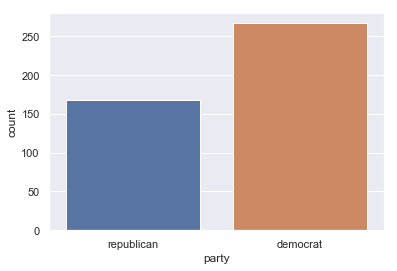

In [730]:
sns.countplot(y)

In [731]:
y.value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [732]:
def predict_dem(X):
    return np.full((len(X), 1), 'democrat')

In [733]:
def predict_repub(X):
    return np.full((len(X), 1), 'republican')

In [734]:
print(metrics.accuracy_score(y_test, predict_dem(y_test)))

0.5877862595419847


In [735]:
print(metrics.accuracy_score(y_test, predict_repub(y_test)))

0.4122137404580153


# Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [736]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred))

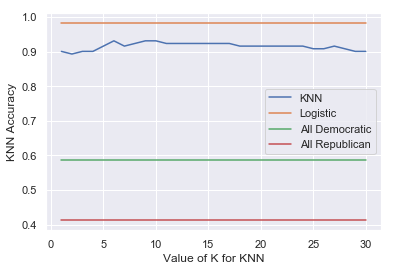

In [737]:
plt.plot(k_range, 
         k_scores, 
         label="KNN")
plt.plot(k_range, 
         np.full((len(k_scores), 1), lm1.score(X_train, y_train)), 
         label="Logistic")
plt.plot(k_range, 
         np.full((len(k_scores), 1), metrics.accuracy_score(y_test, predict_dem(y_test))), 
         label="All Democratic")
plt.plot(k_range, 
         np.full((len(k_scores), 1), metrics.accuracy_score(y_test, predict_repub(y_test))), 
         label="All Republican")
plt.xlabel('Value of K for KNN')
plt.ylabel('KNN Accuracy')
plt.legend(loc='center right')

# Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

    from sklearn.learning_curve import learning_curve
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

    train_cv_err = np.mean(train_err, axis=1)
    test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.



In [738]:
# from sklearn.model_selection import validation_curve
# train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha", np.logspace(-7, 3, 3), cv=5)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

In [739]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

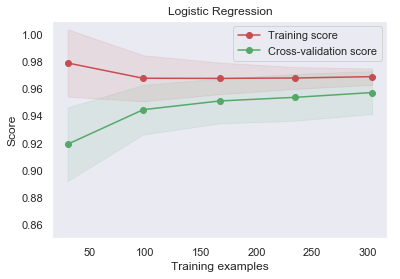

In [740]:
title = "Logistic Regression"
# Cross validation with 100 iterations to get smoother mean test and train score curves
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=4444)

estimator = LogisticRegression(C=1, solver='lbfgs')
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

plt.show()

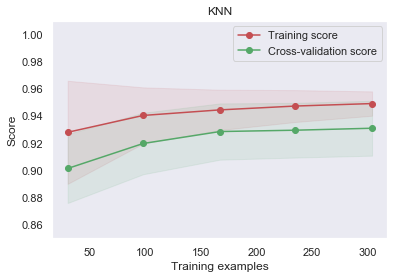

In [741]:
title = "KNN"
# Cross validation with 100 iterations to get smoother mean test and train score curves
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=4444)

estimator = KNeighborsClassifier(n_neighbors=6)
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

plt.show()

# Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

    from sklearn.naive_bayes import GaussianNB
SVM (Support Vector Machine) Classifier

    from sklearn.svm import SVC
Decision Tree

    from sklearn.tree import DecisionTreeClassifier
Random Forest

    from sklearn.ensemble import RandomForestClassifier


In [742]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

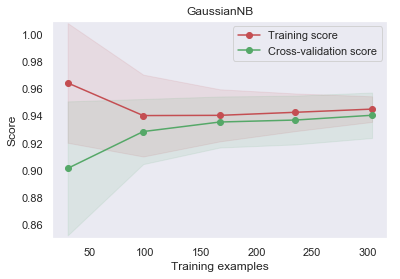

In [743]:
title = "GaussianNB"
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

plt.show()

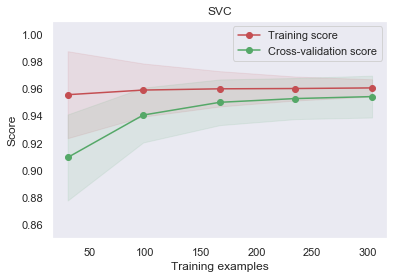

In [744]:
title = "SVC"
estimator = SVC()
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)
plt.show()

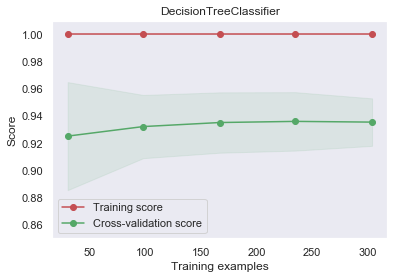

In [745]:
title = "DecisionTreeClassifier"
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)
plt.show()

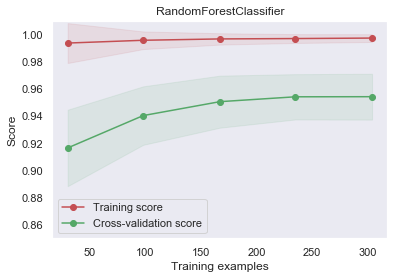

In [746]:
title = "RandomForestClassifier"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)
plt.show()

# Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

    from sklearn.cross_validation import cross_val_score
Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.



In [747]:
from sklearn.model_selection import cross_val_score

In [748]:
estimator = LogisticRegression(C=1, solver='lbfgs')
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9572519083969466, 0.015792489210364264)

In [749]:
estimator = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9309923664122138, 0.02019426658172393)

In [750]:
estimator = GaussianNB()
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9405343511450382, 0.016734628252914455)

In [751]:
estimator = SVC(gamma='scale')
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9555725190839697, 0.01569551784252332)

In [752]:
estimator = DecisionTreeClassifier()
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9349618320610691, 0.019565825152489537)

In [753]:
estimator = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9591603053435116, 0.015470968091229942)

# Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.



In [754]:
votes = pd.read_csv('house-votes-84.data', header=None)

votes.columns = ['party',\
                 'v01','v02','v03','v04','v05','v06','v07','v08','v09','v10','v11','v12','v13','v14','v15','v16']

votes = votes.replace('y', 1)
votes = votes.replace('n', 0)
votes = votes.replace('?', np.NaN)
votes.fillna(votes.median(), inplace = True) 
votes = votes.drop(['party'], axis=1)

In [755]:
y = votes.pop('v11')
X = votes

In [756]:
estimator = LogisticRegression(C=1, solver='lbfgs')
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.6752671755725191, 0.031277595472734614)

In [757]:
estimator = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.6733587786259543, 0.03392088472271578)

# Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?



In [758]:
movies = pd.read_csv('2013_movies.csv')

In [759]:
movies['ReleaseDate'] = movies.apply(lambda x: (pd.to_datetime(x['ReleaseDate'])), axis=1)
movies['ShortDate'] = movies.apply(lambda x: \
                                   (x['ReleaseDate'].strftime('%m')+"-"+x['ReleaseDate'].strftime('%d')), axis=1)
movies['Month'] = movies.apply(lambda x: \
                                   (x['ReleaseDate'].strftime('%m')), axis=1)
movies['ReleaseDate'] = movies['ReleaseDate'].dt.date
movies.dropna(inplace=True)

In [760]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ShortDate,Month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11-22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,05-03,05
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11-22,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,07-03,07
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,06-14,06


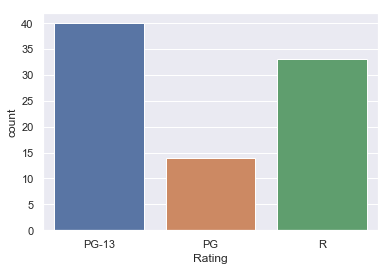

In [761]:
sns.countplot(movies.Rating)

In [762]:
y = movies.pop('Rating')
X = movies[['Budget', 'DomesticTotalGross', 'Runtime']]

In [763]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [764]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5555555555555556


In [765]:
lm1 = LogisticRegression(C=1, solver='lbfgs', multi_class='auto')
lm1.fit(X_train, y_train)
lm1.score(X_test, y_test)

0.4444444444444444

In [766]:
estimator = LogisticRegression(C=1, solver='lbfgs', multi_class='auto')
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.5107407407407407, 0.08985508833595807)

In [767]:
estimator = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.537037037037037, 0.08502400209814072)

In [768]:
def predict_mode(X):
    return np.full((len(X), 1), X.mode().iloc[0])

In [769]:
print(metrics.accuracy_score(y_test, predict_mode(y_test)))

0.4074074074074074


Logistic Regression is more than 10% better on average than than the mode predictor. <br>
KNN is nearly 13% better on average than than the mode predictor.

In [770]:
lm1.coef_

array([[-3.46362017e-09, -6.62982713e-10, -8.81243031e-14],
       [ 1.31097864e-08, -3.24024400e-09, -4.27147566e-14],
       [-9.64616627e-09,  3.90322671e-09,  1.30839060e-13]])

In [771]:
lm1.intercept_

array([-6.50983848e-16, -4.96228140e-16,  1.14721199e-15])

Budget, then DomesticTotalGross, then Runtime are the best predictors of Rating. <br>

# Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

* What is the average and standard deviation of the age of all of the patients?
* What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
* What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
* Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
* What is the earliest year of surgery in this dataset?
* What is the most recent year of surgery?
* Use logistic regression to predict survival after 5 years. How well does your model do?
* What are the coefficients of logistic regression? Which features affect the outcome how?
* Draw the learning curve for logistic regression in this case.

In [772]:
haberman = pd.read_csv('haberman.data')

In [773]:
haberman.columns = ['age', 'year', 'nodes', 'survival']

In [774]:
haberman.head()

,age,year,nodes,survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [775]:
age_mean_all = np.mean(haberman.age)
age_std_all = np.std(haberman.age)
print(age_mean_all, age_std_all)

52.5311475409836 10.726396748570311


In [776]:
haberman.groupby('survival')['age'].mean()

survival
1    52.116071
2    53.679012
Name: age, dtype: float64

In [777]:
haberman.groupby('survival')['age'].std()

survival
1    10.937446
2    10.167137
Name: age, dtype: float64

The average age of all patients is 52.53 (std dev = 10.72) <br>
The average age of patients surviving 5+ years is 52.12 (std dev = 10.93) <br>
The average age of patients not surviving 5 years is 53.68 (std dev = 19.16)

(array([235.,  30.,  18.,   8.,   9.,   2.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

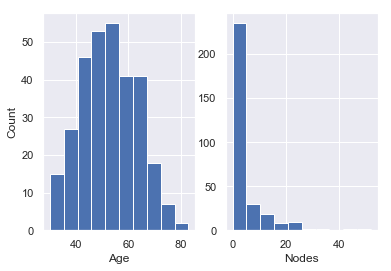

In [778]:
plt.subplot(121)
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(haberman.age)
plt.subplot(122)
plt.xlabel("Nodes")
plt.hist(haberman.nodes)

In [779]:
print("Earliest year of surgery: 19"+str(haberman.year.min()))

Earliest year of surgery: 1958


In [780]:
print("Latest year of surgery: 19"+str(haberman.year.max()))

Latest year of surgery: 1969


In [781]:
y = haberman.pop('survival')
X = haberman
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [782]:
lm1 = LogisticRegression(C=1, solver='lbfgs')
lm1.fit(X_train, y_train)
lm1.score(X_train, y_train)

0.7464788732394366

In [783]:
lm1.coef_

array([[0.00898512, 0.03507274, 0.0807597 ]])

The number of nodes has the largest influence upon survival rate. <br>
Year of surgery is next, with age of patient having little effect.

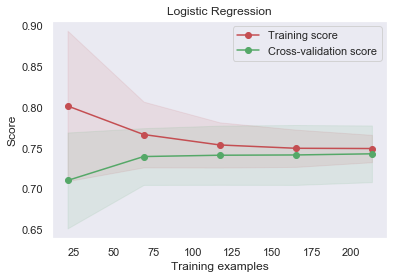

In [784]:
title = "Logistic Regression"
# Cross validation with 100 iterations to get smoother mean test and train score curves
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=4444)

estimator = LogisticRegression(C=1, solver='lbfgs')
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()